# Project: Ensemble Techniques - Travel Package Purchase Prediction

----------------------
## <a id = "link100">' Contents '</a> 

- <a href = #link1>Import Libraries, Define Functions and Load Datasets </a>
- <a href = #link2>EDA</a>
    - <a href = #link3>Univariate Analysis</a>
    - <a href = #link4>Bivariate Analysis</a>
- <a href = #link5>Data Treatment</a>
- <a href = #link6>Model Build, Improvement and Evaluation</a>
- <a href = #link7>Actionable Insights and Recommendations</a>
----------------------

## <a id = "link1"></a> Import Libraries, Define Functions & Load Datasets

In [1]:
#---------------------
# LIBRARIES
#---------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.impute import SimpleImputer

from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

In [2]:
# Definition data set to add context
TDict = pd.read_excel("Tourism.xlsx", sheet_name = 'Data Dict', index_col=2, header=1)
TDict.drop(TDict.columns[0:2], axis=1, inplace=True)
TDict.rename(columns = {'Discerption':'Description'}, inplace = True)
TDict.sort_values(by='Variable', ascending=True, inplace=True)
TDict

Description
Variable                                                                  
Age                                                        Age of customer
CityTier                                                         City tier
CustomerID                                              Unique customer ID
Designation                Designation of customer in current organization
DurationOfPitch               Duration of pitch by a sales man to customer
Gender                                                  Gender of customer
MaritalStatus                                   Marital status of customer
MonthlyIncome                             Gross monthly income of customer
NumberOfChildrenVisited       Total number of children visit with customer
NumberOfFollowups        Total number of follow up has been done by sal...
NumberOfPersonVisited            Total number of person came with customer
NumberOfTrips                 Average number of trip in a year by customer
Occupation                                          Occupation of customer
OwnCar                                           Customers owns a car flag
Passport                                            Customer passport flag
PitchSatisfactionScore                      Sales pitch satisfactory score
PreferredPropertyStar          Preferred hotel property rating by customer
ProdTaken                                               Product taken flag
ProductPitched                             Product pitched by sales person
TypeofContact            How customer was contacted (Company Invited or...

In [3]:
# Lists for columns
myInteractions = ["PitchSatisfactionScore","ProductPitched" ,"NumberOfFollowups" ,"DurationOfPitch"]
myTarget = ['ProdTaken']
myFeatures = ['Age', 'TypeofContact', 'CityTier', 'Occupation', 'Gender','NumberOfPersonVisited', 'PreferredPropertyStar', 'MaritalStatus','NumberOfTrips', 'Passport', 'OwnCar','Designation', 'MonthlyIncome', 'PitchSatisfactionScore','ProductPitched', 'NumberOfFollowups']

In [4]:
# Main data set we'll be using
Tour = pd.read_excel("Tourism.xlsx", sheet_name = 'Tourism')
Tour.set_index('CustomerID', drop=True, append=False, inplace=True, verify_integrity=True)
Tour.columns

Index(['ProdTaken', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch',
       'Occupation', 'Gender', 'NumberOfPersonVisited', 'NumberOfFollowups',
       'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisited', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [5]:
Tour['ProdTaken'].value_counts()

0    3968
1     920
Name: ProdTaken, dtype: int64

In [6]:
# Cutting data into Customer
Customer = Tour.copy()
Customer.drop(myInteractions,axis=1,inplace=True)
# Cutting data into Interactions
Interactions = Tour[myInteractions]

# Reorder/structure
Tour = pd.concat([Customer, Interactions], axis=1)
Tour.columns

Index(['ProdTaken', 'Age', 'TypeofContact', 'CityTier', 'Occupation', 'Gender',
       'NumberOfPersonVisited', 'PreferredPropertyStar', 'MaritalStatus',
       'NumberOfTrips', 'Passport', 'OwnCar', 'NumberOfChildrenVisited',
       'Designation', 'MonthlyIncome', 'PitchSatisfactionScore',
       'ProductPitched', 'NumberOfFollowups', 'DurationOfPitch'],
      dtype='object')

In [7]:
Customer.transpose()
# Feature Engineering Candidate: "TypeofContact", "Occupation" , "Gender", "MaritalStatus", "Designation"

CustomerID                     200000           200001        200002  \
ProdTaken                           1                0             1   
Age                                41               49            37   
TypeofContact            Self Enquiry  Company Invited  Self Enquiry   
CityTier                            3                1             1   
Occupation                   Salaried         Salaried   Free Lancer   
Gender                         Female             Male          Male   
NumberOfPersonVisited               3                3             3   
PreferredPropertyStar               3                4             3   
MaritalStatus                  Single         Divorced        Single   
NumberOfTrips                       1                2             7   
Passport                            1                0             1   
OwnCar                              1                1             0   
NumberOfChildrenVisited             0                2             0   
Designation                   Manager          Manager     Executive   
MonthlyIncome                   20993            20130         17090   

CustomerID                        200003          200004           200005  \
ProdTaken                              0               0                0   
Age                                   33             NaN               32   
TypeofContact            Company Invited    Self Enquiry  Company Invited   
CityTier                               1               1                1   
Occupation                      Salaried  Small Business         Salaried   
Gender                            Female            Male             Male   
NumberOfPersonVisited                  2               2                3   
PreferredPropertyStar                  3               4                3   
MaritalStatus                   Divorced        Divorced           Single   
NumberOfTrips                          2               1                1   
Passport                               1               0                0   
OwnCar                                 1               1                1   
NumberOfChildrenVisited                1               0                1   
Designation                    Executive       Executive        Executive   
MonthlyIncome                      17909           18468            18068   

CustomerID                       200006        200007           200008  \
ProdTaken                             0             0                0   
Age                                  59            30               38   
TypeofContact              Self Enquiry  Self Enquiry  Company Invited   
CityTier                              1             1                1   
Occupation               Small Business      Salaried         Salaried   
Gender                           Female          Male             Male   
NumberOfPersonVisited                 2             3                2   
PreferredPropertyStar                 5             3                3   
MaritalStatus                  Divorced       Married        Unmarried   
NumberOfTrips                         5             2                1   
Passport                              1             0                0   
OwnCar                                1             0                0   
NumberOfChildrenVisited               1             1                0   
Designation                   Executive     Executive   Senior Manager   
MonthlyIncome                     17670         17693            24526   

CustomerID                       200009  ...          204878          204879  \
ProdTaken                             0  ...               1               1   
Age                                  36  ...              35              26   
TypeofContact              Self Enquiry  ...    Self Enquiry    Self Enquiry   
CityTier                              1  ...               1               2   
Occupation               Smal

In [8]:
Interactions.transpose()
# Feature Engineering Candidate: 'ProductPitched'

CustomerID              200000  200001 200002 200003 200004 200005 200006  \
PitchSatisfactionScore       2       3      3      5      5      5      2   
ProductPitched          Deluxe  Deluxe  Basic  Basic  Basic  Basic  Basic   
NumberOfFollowups            3       4      4      3      3      3      2   
DurationOfPitch              6      14      8      9      8      8      9   

CustomerID             200007    200008  200009  ...  204878 204879  204880  \
PitchSatisfactionScore      2         3       3  ...       4      3       3   
ProductPitched          Basic  Standard  Deluxe  ...  Deluxe  Basic  Deluxe   
NumberOfFollowups           3         4       3  ...       4      4       4   
DurationOfPitch            30        29      33  ...      17     27      28   

CustomerID             204881 204882  204883 204884    204885 204886 204887  
PitchSatisfactionScore      1      5       1      3         1      5      3  
ProductPitched          Basic  Basic  Deluxe  Basic  Standard  Basic  Basic  
NumberOfFollowups           2      5       5      5         4      4      4  
DurationOfPitch            25     20       9     31        17     16     14  

[4 rows x 4888 columns]

####  Insight: Initial Scoping
- Excel was sent with two sheets, definitions & dataset.
- Dataset is centered on two concepts, the Customer & Interactions.
- Large dataset(4.8 Thousand rows+), 19 value columns, 1 index column.
- Mixed data types: float64(7), int64(7), object(6)
    - Categorical & Continous, 
    - some non-object are Categorical

---
## <a id = "link2">EDA</a>

In [9]:
######### FUNTIONS FOR EDA #########
## Basic Scoping
def firstImpressions(data):
    tempcols = sorted(data.columns)
    data = data.reindex(tempcols, axis=1)
    
    print('~~~~~~~ SHAPE ~~~~~~~')
    print(data.shape, '\n')
    print('~~~~~~~ INFO ~~~~~~~')
    print(data.info(), '\n')
    print('~~~~~~~ Distinct ~~~~~~~')
    print(data.nunique().sort_values(ascending=False), '\n')

    return Tour.describe()

## Scope null data
def nulls(data):
    Tour.isnull()
    if ( data.isnull().values.any() ):
        print('~~~~~~~ Null By Quantity ~~~~~~~')
        nullCount = data.isnull().sum().sort_values(ascending=False)
        print(nullCount, '\n')
        print('~~~~~~~ Null By Percent ~~~~~~~')
        print(100*nullCount/(Tour.shape[0]-nullCount), '\n')
    else:
        print("no null values")
    plt.figure(figsize=(20, 12));
    sns.heatmap(Tour.isnull(),yticklabels=False, cbar=False, cmap= "viridis");
    plt.xticks(rotation = 45);
    plt.show()

 ### <a id = "link3">Univariate Analysis</a>

In [10]:
firstImpressions(Tour).transpose()

~~~~~~~ SHAPE ~~~~~~~
(4888, 19) 

~~~~~~~ INFO ~~~~~~~
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4888 entries, 200000 to 204887
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4662 non-null   float64
 1   CityTier                 4888 non-null   int64  
 2   Designation              4888 non-null   object 
 3   DurationOfPitch          4637 non-null   float64
 4   Gender                   4888 non-null   object 
 5   MaritalStatus            4888 non-null   object 
 6   MonthlyIncome            4655 non-null   float64
 7   NumberOfChildrenVisited  4822 non-null   float64
 8   NumberOfFollowups        4843 non-null   float64
 9   NumberOfPersonVisited    4888 non-null   int64  
 10  NumberOfTrips            4748 non-null   float64
 11  Occupation               4888 non-null   object 
 12  OwnCar                   4888 non-null   int64  
 13  Passport       

count          mean          std     min      25%  \
ProdTaken                4888.0      0.188216     0.390925     0.0      0.0   
Age                      4662.0     37.622265     9.316387    18.0     31.0   
CityTier                 4888.0      1.654255     0.916583     1.0      1.0   
NumberOfPersonVisited    4888.0      2.905074     0.724891     1.0      2.0   
PreferredPropertyStar    4862.0      3.581037     0.798009     3.0      3.0   
NumberOfTrips            4748.0      3.236521     1.849019     1.0      2.0   
Passport                 4888.0      0.290917     0.454232     0.0      0.0   
OwnCar                   4888.0      0.620295     0.485363     0.0      0.0   
NumberOfChildrenVisited  4822.0      1.187267     0.857861     0.0      1.0   
MonthlyIncome            4655.0  23619.853491  5380.698361  1000.0  20346.0   
PitchSatisfactionScore   4888.0      3.078151     1.365792     1.0      2.0   
NumberOfFollowups        4843.0      3.708445     1.002509     1.0      3.0   
DurationOfPitch          4637.0     15.490835     8.519643     5.0      9.0   

                             50%      75%      max  
ProdTaken                    0.0      0.0      1.0  
Age                         36.0     44.0     61.0  
CityTier                     1.0      3.0      3.0  
NumberOfPersonVisited        3.0      3.0      5.0  
PreferredPropertyStar        3.0      4.0      5.0  
NumberOfTrips                3.0      4.0     22.0  
Passport                     0.0      1.0      1.0  
OwnCar                       1.0      1.0      1.0  
NumberOfChildrenVisited      1.0      2.0      3.0  
MonthlyIncome            22347.0  25571.0  98678.0  
PitchSatisfactionScore       3.0      4.0      5.0  
NumberOfFollowups            4.0      4.0      6.0  
DurationOfPitch             13.0     20.0    127.0

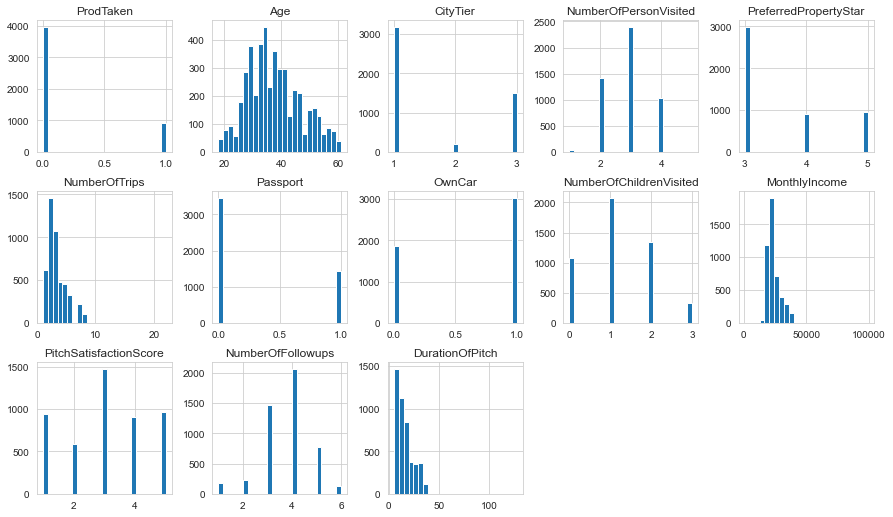

0    81.178396
1    18.821604
Name: ProdTaken, dtype: float64

In [11]:
Tour[:].hist(stacked=True, bins=25, figsize=(15,15), layout=(5,5));
plt.show()
Tour['ProdTaken'].value_counts(normalize=True)*100

Company Invited    1419
Self Enquiry       3444
Name: TypeofContact, dtype: int64


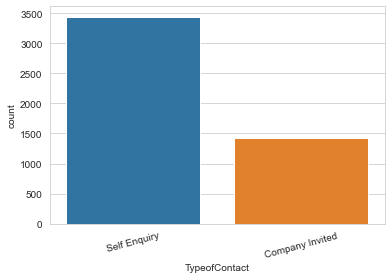


Free Lancer          2
Large Business     434
Small Business    2084
Salaried          2368
Name: Occupation, dtype: int64


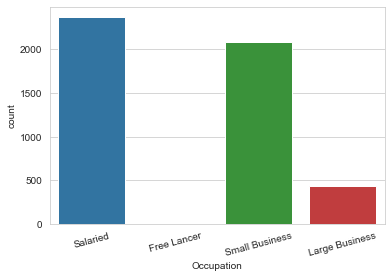


Fe Male     155
Female     1817
Male       2916
Name: Gender, dtype: int64


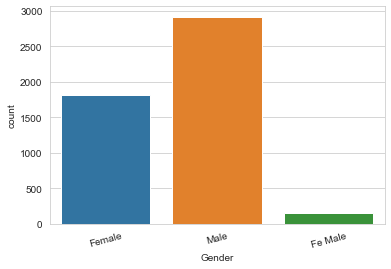


Unmarried     682
Single        916
Divorced      950
Married      2340
Name: MaritalStatus, dtype: int64


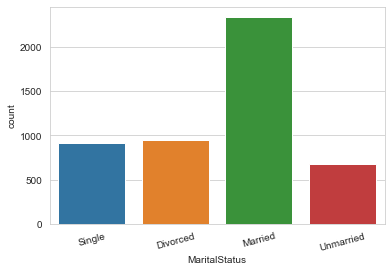


VP                 230
AVP                342
Senior Manager     742
Manager           1732
Executive         1842
Name: Designation, dtype: int64


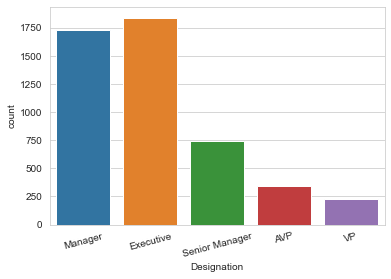


King             230
Super Deluxe     342
Standard         742
Deluxe          1732
Basic           1842
Name: ProductPitched, dtype: int64


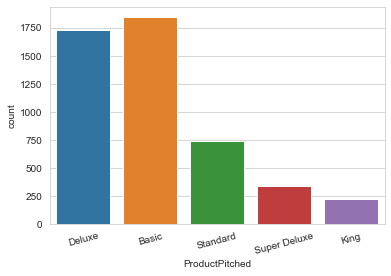

In [12]:
# Display object dtypes
for i in Tour.select_dtypes( include='object' ):
    print(Tour[i].value_counts(sort=True, ascending=True))
    sns.countplot(Tour[i])
    plt.xticks(rotation = 15);
    plt.show()
    print()

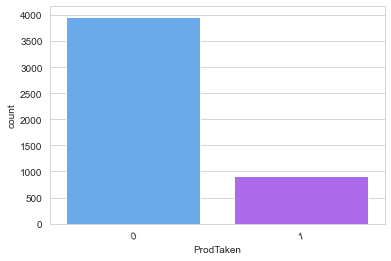

0    3968
1     920
Name: ProdTaken, dtype: int64



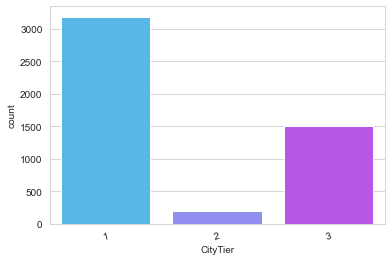

1    3190
3    1500
2     198
Name: CityTier, dtype: int64



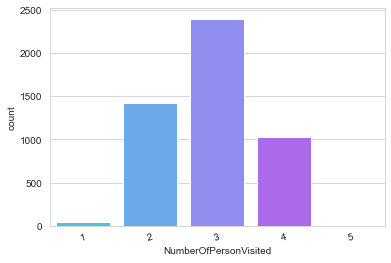

3    2402
2    1418
4    1026
1      39
5       3
Name: NumberOfPersonVisited, dtype: int64



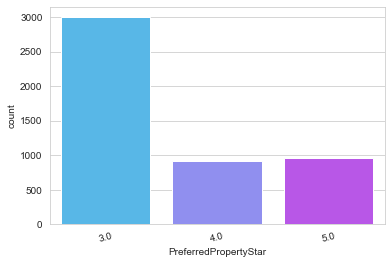

3.0    2993
5.0     956
4.0     913
Name: PreferredPropertyStar, dtype: int64



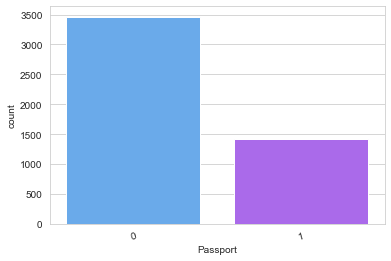

0    3466
1    1422
Name: Passport, dtype: int64



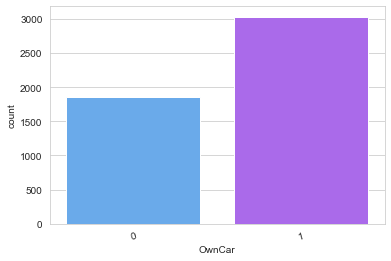

1    3032
0    1856
Name: OwnCar, dtype: int64



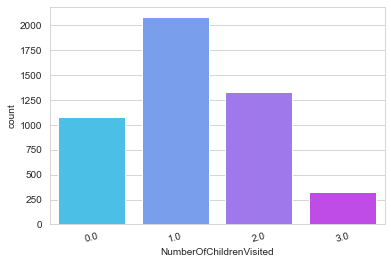

1.0    2080
2.0    1335
0.0    1082
3.0     325
Name: NumberOfChildrenVisited, dtype: int64



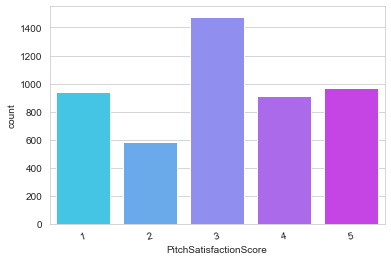

3    1478
5     970
1     942
4     912
2     586
Name: PitchSatisfactionScore, dtype: int64



In [13]:
# Display those that are under 5 unique values
for i in Tour.select_dtypes( exclude='object' ):
    if (Tour[i].nunique() <= 5 ):
        sns.countplot(Tour[i], palette="cool")
        plt.xticks(rotation = 15);
        plt.show()
        print(Tour[i].value_counts(sort=True, ascending=False))
        print()

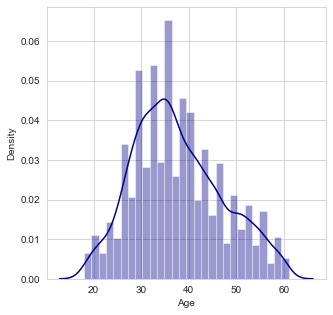

35.0    237
36.0    231
34.0    211
31.0    203
30.0    199
32.0    197
33.0    189
37.0    185
29.0    178
38.0    176
41.0    155
39.0    150
28.0    147
40.0    146
42.0    142
27.0    138
43.0    130
46.0    121
45.0    116
26.0    106
44.0    105
51.0     90
47.0     88
50.0     86
25.0     74
52.0     68
53.0     66
48.0     65
49.0     65
55.0     64
54.0     61
56.0     58
24.0     56
22.0     46
23.0     46
59.0     44
21.0     41
20.0     38
19.0     32
58.0     31
60.0     29
57.0     29
18.0     14
61.0      9
Name: Age, dtype: int64



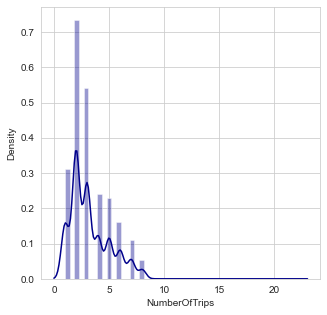

2.0     1464
3.0     1079
1.0      620
4.0      478
5.0      458
6.0      322
7.0      218
8.0      105
21.0       1
19.0       1
22.0       1
20.0       1
Name: NumberOfTrips, dtype: int64



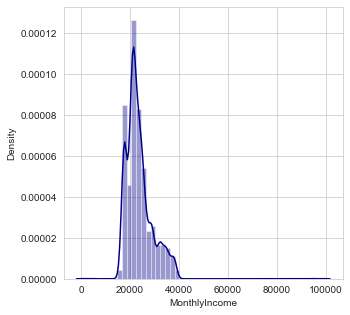

21020.0    7
20855.0    7
17342.0    7
21288.0    7
17741.0    6
          ..
24924.0    1
19507.0    1
21108.0    1
20953.0    1
1000.0     1
Name: MonthlyIncome, Length: 2475, dtype: int64



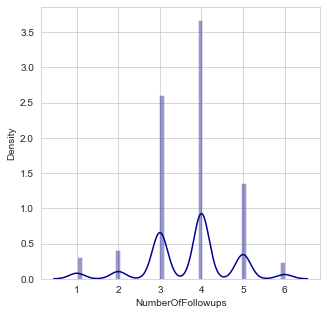

4.0    2068
3.0    1466
5.0     768
2.0     229
1.0     176
6.0     136
Name: NumberOfFollowups, dtype: int64



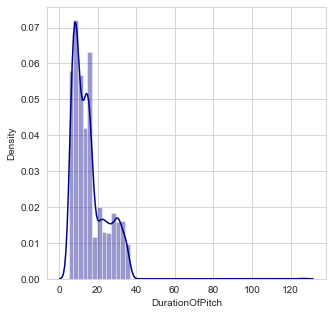

9.0      483
7.0      342
8.0      333
6.0      307
16.0     274
15.0     269
14.0     253
10.0     244
13.0     223
11.0     205
12.0     195
17.0     172
30.0      95
22.0      89
31.0      83
23.0      79
18.0      75
32.0      74
29.0      74
21.0      73
25.0      73
27.0      72
26.0      72
24.0      70
35.0      66
20.0      65
28.0      61
33.0      57
19.0      57
34.0      50
36.0      44
5.0        6
126.0      1
127.0      1
Name: DurationOfPitch, dtype: int64



In [14]:
# Display those that are above 5 unique values
for i in Tour.select_dtypes(exclude='object'):
    if (Tour[i].nunique() >5 ):
        plt.figure(figsize=(5, 5));
        sns.distplot(Tour[i].dropna(), color='darkblue')
#         dropna might be overkill but would prefer it not affect my distributions
        plt.xticks(rotation = 0);
        plt.show()
        print(Tour[i].value_counts(sort=True, ascending=False))
        print()

<AxesSubplot:xlabel='Gender', ylabel='count'>

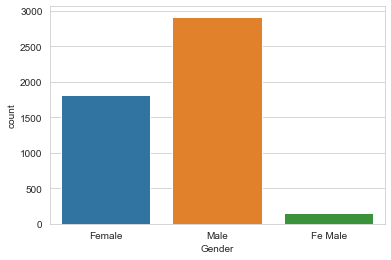

In [15]:
sns.countplot(Tour['Gender'] )

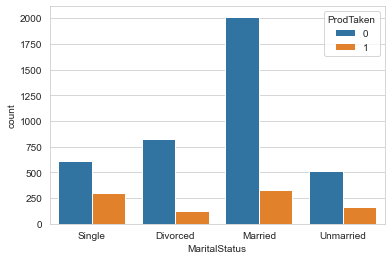

In [16]:
sns.countplot(Tour['MaritalStatus'], hue=Tour['ProdTaken']);

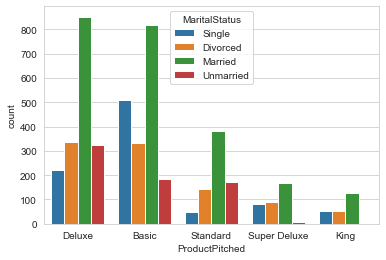

In [17]:
sns.countplot(Tour['ProductPitched'], hue=Tour['MaritalStatus']);

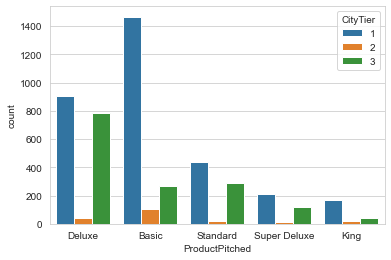

In [18]:
sns.countplot(Tour['ProductPitched'], hue=Tour[ 'CityTier']);

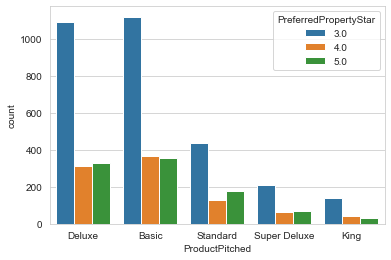

In [19]:
sns.countplot(Tour['ProductPitched'], hue=Tour[ 'PreferredPropertyStar']);

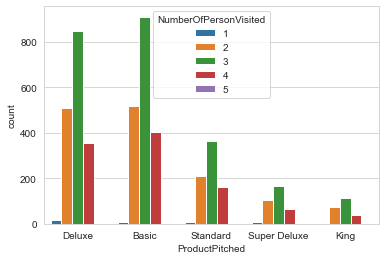

In [20]:
sns.countplot(Tour['ProductPitched' ], hue=Tour['NumberOfPersonVisited']);

~~~~~~~ Null By Quantity ~~~~~~~
DurationOfPitch            251
MonthlyIncome              233
Age                        226
NumberOfTrips              140
NumberOfChildrenVisited     66
NumberOfFollowups           45
PreferredPropertyStar       26
TypeofContact               25
PitchSatisfactionScore       0
Designation                  0
OwnCar                       0
Passport                     0
MaritalStatus                0
NumberOfPersonVisited        0
Gender                       0
Occupation                   0
CityTier                     0
ProductPitched               0
ProdTaken                    0
dtype: int64 

~~~~~~~ Null By Percent ~~~~~~~
DurationOfPitch            5.412983
MonthlyIncome              5.005371
Age                        4.847705
NumberOfTrips              2.948610
NumberOfChildrenVisited    1.368727
NumberOfFollowups          0.929176
PreferredPropertyStar      0.534759
TypeofContact              0.514086
PitchSatisfactionScore     0.000000
Designa

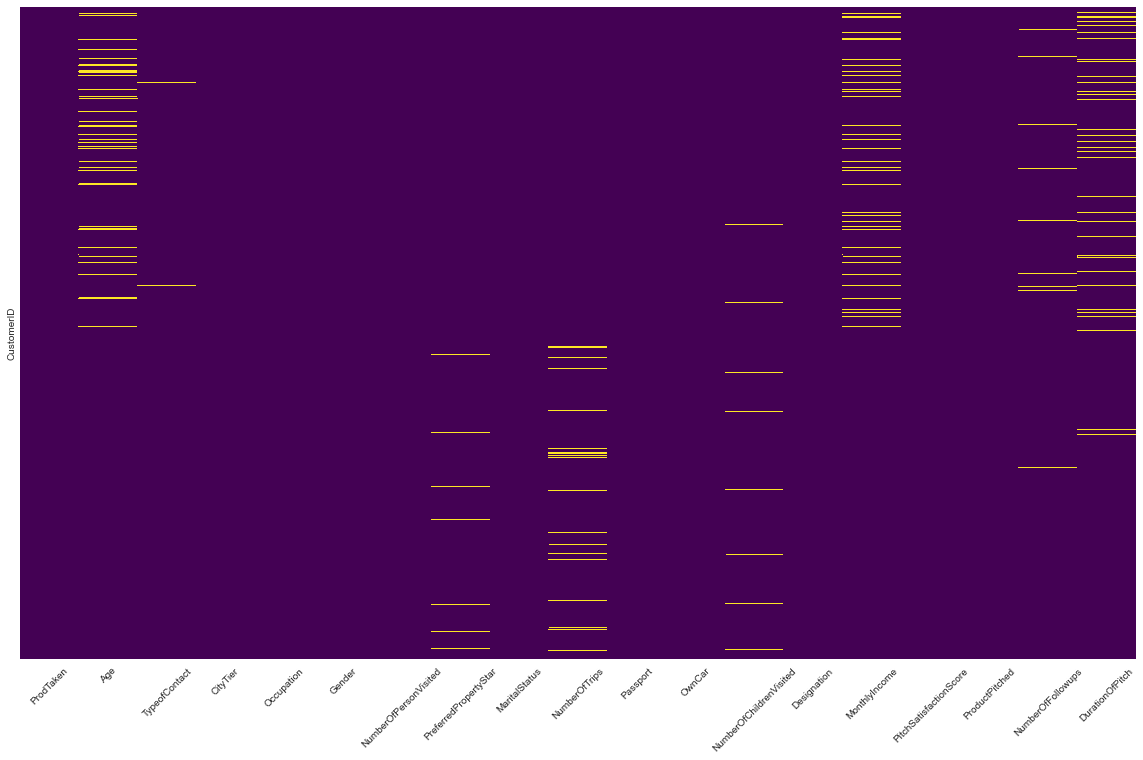

In [21]:
nulls(Tour)

### Insight: Univariate analysis
**Customer**
- Age has a slight-right sckewed Bellshaped curve, giving early-mid 30's a higher represntation.
- Most Customers are salaried or own a small business.
- Most Customer inquired rather than reached out to.
- Most are married & have children with most having just one.
    - NumberOfPersonsVisited will overlap with NumberOfChildrenVisted
- Most preferred PreferredPropertyStar was a 3 out of 5.
- Many don't have a large amount of Trips. Right-skewed bellshap-curve focused around 2 and 3 trips.
- MonthlyIncome is heavily distrubuted on the lower end, right-skew with very few outliers.

**Interactions**
- In the interactions, a lot of effort was put into following up & pitching, much of which had a satisfaction score 3/5.
- CityTier is not clear, assumption is they may be mapped to Suburb, Urban, Rural.

**Data Cleanse**
- Catagories with Hierarchy are "Designation" & "ProductPitched".
- Gender typo will be corrected.
- There are sevaral null values.
- There are some outliers.


Based on the data when comparing Customer features for Basic, Deluxe, King, Standard, Super Deluxe. 
The Features for MaritalStatus='Married',CityTier="1" ,NumberOfPersonVisited ="3", and PreferredPropertyStar="3" were all consistent.

-----------------------------------------------------------------

### <a id = "link4">Bivariate Analysis</a>

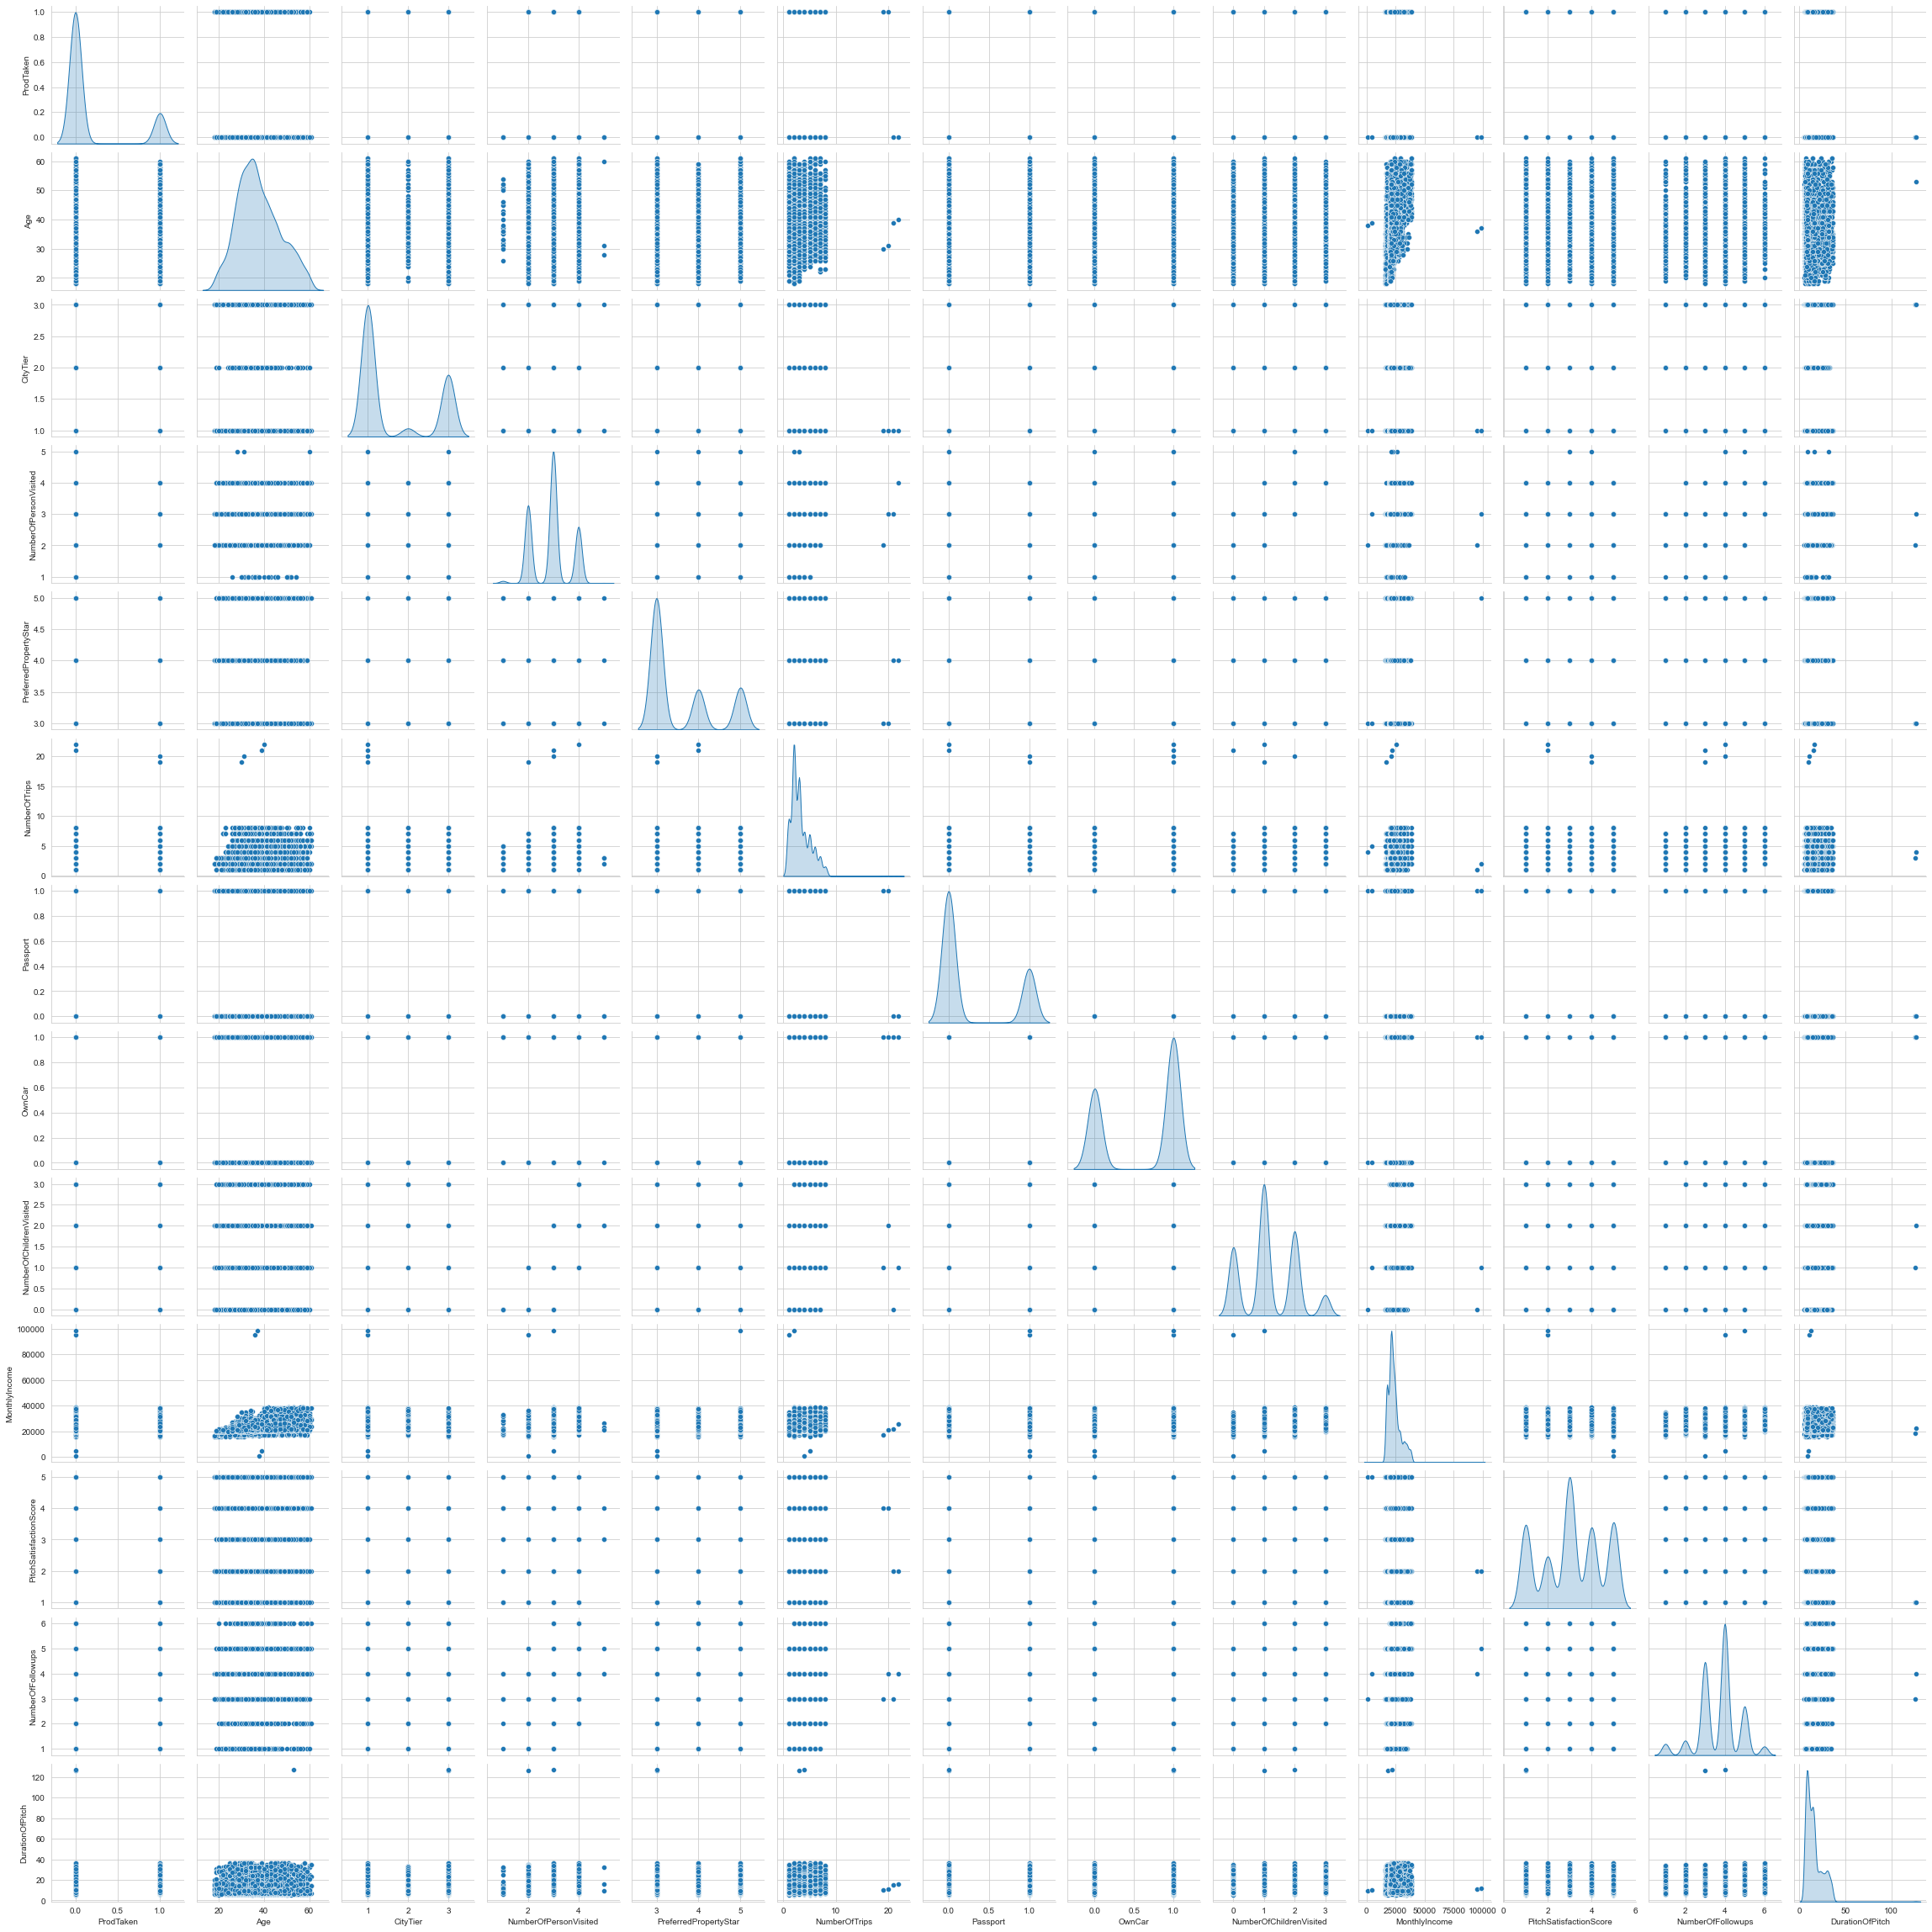

In [22]:
sns.pairplot( Tour,diag_kind='kde');

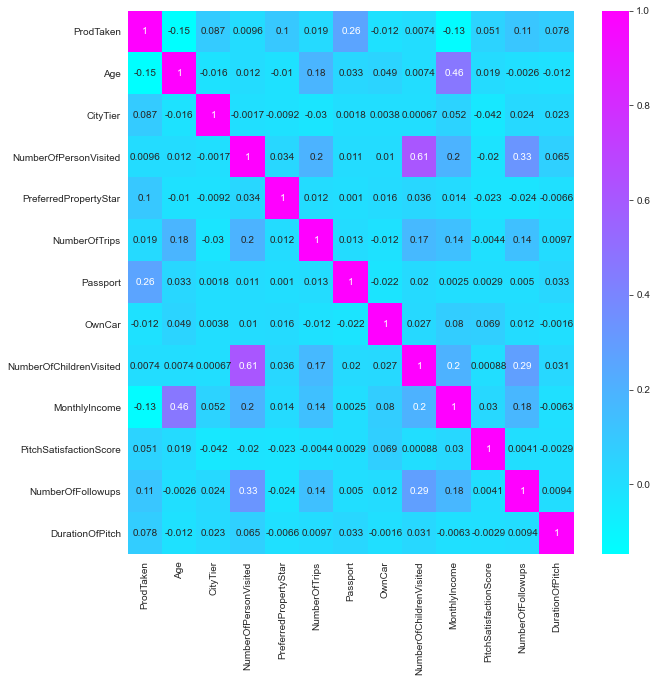

In [23]:
ig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(Tour.corr() , annot=True , cmap= 'cool');

In [24]:
Tour.corr().sort_values('ProdTaken', ascending=False, axis=0)

ProdTaken       Age  CityTier  NumberOfPersonVisited  \
ProdTaken                 1.000000 -0.147254  0.086852               0.009627   
Passport                  0.260844  0.033399  0.001793               0.011177   
NumberOfFollowups         0.112171 -0.002577  0.023652               0.328569   
PreferredPropertyStar     0.099577 -0.010474 -0.009164               0.033867   
CityTier                  0.086852 -0.015625  1.000000              -0.001671   
DurationOfPitch           0.078257 -0.012063  0.022703               0.065141   
PitchSatisfactionScore    0.051394  0.018510 -0.042160              -0.019581   
NumberOfTrips             0.018898  0.184905 -0.029709               0.195223   
NumberOfPersonVisited     0.009627  0.011621 -0.001671               1.000000   
NumberOfChildrenVisited   0.007421  0.007370  0.000672               0.610621   
OwnCar                   -0.011508  0.048654  0.003817               0.010362   
MonthlyIncome            -0.130585  0.464869  0.051817               0.195134   
Age                      -0.147254  1.000000 -0.015625               0.011621   

                         PreferredPropertyStar  NumberOfTrips  Passport  \
ProdTaken                             0.099577       0.018898  0.260844   
Passport                              0.001040       0.012949  1.000000   
NumberOfFollowups                    -0.024176       0.139517  0.004970   
PreferredPropertyStar                 1.000000       0.012115  0.001040   
CityTier                             -0.009164      -0.029709  0.001793   
DurationOfPitch                      -0.006637       0.009715  0.033034   
PitchSatisfactionScore               -0.022701      -0.004378  0.002926   
NumberOfTrips                         0.012115       1.000000  0.012949   
NumberOfPersonVisited                 0.033867       0.195223  0.011177   
NumberOfChildrenVisited               0.035798       0.168795  0.020264   
OwnCar                                0.015742      -0.011825 -0.022330   
MonthlyIncome                         0.014289       0.139105  0.002545   
Age                                  -0.010474       0.184905  0.033399   

                           OwnCar  NumberOfChildrenVisited  MonthlyIncome  \
ProdTaken               -0.011508                 0.007421      -0.130585   
Passport                -0.022330                 0.020264       0.002545   
NumberOfFollowups        0.012112                 0.286425       0.176503   
PreferredPropertyStar    0.015742                 0.035798       0.014289   
CityTier                 0.003817                 0.000672       0.051817   
DurationOfPitch         -0.001626                 0.031408      -0.006252   
PitchSatisfactionScore   0.068850                 0.000878       0.030421   
NumberOfTrips           -0.011825                 0.168795       0.139105   
NumberOfPersonVisited    0.010362                 0.610621       0.195134   
NumberOfChildrenVisited  0.026572                 1.000000       0.201643   
OwnCar                   1.000000                 0.026572       0.080262   
MonthlyIncome            0.080262                 0.201643       1.000000   
Age                      0.048654                 0.007370       0.464869   

                         PitchSatisfactionScore  NumberOfFollowups  \
ProdTaken                              0.051394           0.112171   
Passport                               0.002926           0.004970   
NumberOfFollowups                      0.004054           1.000000   
PreferredPropertyStar                 -0.022701          -0.024176   
CityTier                              -0.042160           0.023652   
DurationOfPitch                       -0.002880           0.009434   
PitchSatisfactionScore                 1.000000           0.004054   
NumberOfTrips                         -0.004378           0.139517   
NumberOfPersonVisited                 -0.019581           0.328569   
NumberOfChildrenVisited                0.000878           0.

In [25]:
pd.crosstab(Tour['ProdTaken'],Tour['NumberOfFollowups'],normalize='index')

NumberOfFollowups       1.0       2.0       3.0       4.0       5.0       6.0
ProdTaken                                                                    
0                  0.039685  0.052150  0.310862  0.429662  0.146782  0.020860
1                  0.021930  0.026316  0.267544  0.415570  0.209430  0.059211

In [26]:
pd.crosstab(Tour['ProdTaken'],Tour['Age'],normalize='index')

Age            18.0      19.0      20.0      21.0      22.0      23.0  \
ProdTaken                                                               
0          0.001585  0.002905  0.003434  0.004754  0.008188  0.008716   
1          0.009132  0.023973  0.028539  0.026256  0.017123  0.014840   

Age            24.0      25.0      26.0      27.0  ...      52.0      53.0  \
ProdTaken                                          ...                       
0          0.010037  0.014263  0.018225  0.028526  ...  0.014263  0.015320   
1          0.020548  0.022831  0.042237  0.034247  ...  0.015982  0.009132   

Age            54.0      55.0      56.0      57.0      58.0      59.0  \
ProdTaken                                                               
0          0.015584  0.015055  0.012150  0.006339  0.005283  0.008452   
1          0.002283  0.007991  0.013699  0.005708  0.012557  0.013699   

Age            60.0      61.0  
ProdTaken                      
0          0.007396  0.002377  
1          0.001142  0.000000  

[2 rows x 44 columns]

In [27]:
pd.crosstab(Tour['ProdTaken'],Tour['PreferredPropertyStar'],normalize='index')

PreferredPropertyStar       3.0       4.0       5.0
ProdTaken                                          
0                      0.636018  0.185157  0.178825
1                      0.527352  0.199125  0.273523

In [28]:
pd.crosstab(Tour['ProdTaken'],Tour['PreferredPropertyStar'],normalize='index')

PreferredPropertyStar       3.0       4.0       5.0
ProdTaken                                          
0                      0.636018  0.185157  0.178825
1                      0.527352  0.199125  0.273523

In [29]:
pd.crosstab(Tour['ProductPitched'],Tour['MaritalStatus'],normalize='index')

MaritalStatus   Divorced   Married    Single  Unmarried
ProductPitched                                         
Basic           0.180239  0.442997  0.277416   0.099349
Deluxe          0.193995  0.491917  0.127598   0.186490
King            0.226087  0.547826  0.226087   0.000000
Standard        0.191375  0.512129  0.067385   0.229111
Super Deluxe    0.257310  0.485380  0.239766   0.017544

In [30]:
pd.crosstab(Tour['ProductPitched'],Tour['Passport'],normalize='index')

Passport               0         1
ProductPitched                    
Basic           0.691640  0.308360
Deluxe          0.722864  0.277136
King            0.739130  0.260870
Standard        0.716981  0.283019
Super Deluxe    0.695906  0.304094

###  Insight: Bivariate analysis
- There does not appear to be any strong linear relationships as many of these are categorical in nature.
- However there are some correlations to notice in the correlation matrix which provided better visualization and description than the pairplot. This gave us a better understanding of impact by feature.
    - ProdTaken:
        - Top Three Features with positively correlated are "Passport" ,"NumberOfFollowups" ,"PreferredPropertyStar"
        - Two features have negative correlation (Age and MonthlyIncome)
        - However, no single factor plays an overhelming impact on ProdTaken 
        - Analyzing a the crosstabs for some of the features, reaffirmed this finding. There doesn seem to be much of an impact on correlation to ProdTaken by any one feature.
    - High correlation data to be considered for dropping
        - "NumberOfPersonVisited","NumberOfChildrenVisited" at 61%. NumberOfFollowups supports the conclusion "NumberOfPersonVisited" & "NumberOfChildrenVisited" as the three seem linked.
            - The same is true for 'Age' & 'MonthlyIncome' with a high correlation at .46

    - Removal of NumberOfChildrenVisited would cause the least data loss. 


-----------------------------------------------------------------

## <a id = "link5">Data Treatment</a>
- Outiers and Nulls have little/no impact Decision Trees.
    - Outliers will be left alone.
- However, misclassified data such as Gender does.

-----

#### Typo Correction

In [31]:
# Treating the Typo, 'Fe Male'
typo=Tour['Gender'].unique()[2]
correction=Tour['Gender'].unique()[0]
col= ['Gender']
replace_typo = SimpleImputer(missing_values=typo, strategy='constant' , fill_value=correction)

print('Replacing   \'',typo,'\'   with   \'',correction,'\'')
imputer = replace_typo.fit(Tour[col])
Tour[col] = imputer.transform(Tour[col])

print('Post transform: ',  Tour['Gender'].unique())

Replacing   ' Fe Male '   with   ' Female '
Post transform:  ['Female' 'Male']


In [32]:
Tour.drop(columns='NumberOfChildrenVisited', axis=0, inplace=True)

In [33]:
# Null Treatment so can convert to all Int
replace = SimpleImputer(strategy="mean")
tempcols=['Age', 'MonthlyIncome', 'DurationOfPitch', 'NumberOfFollowups', 'NumberOfTrips', 'PreferredPropertyStar']
Tour[tempcols]
imputer = replace.fit(Tour[tempcols])
Tour[tempcols] = imputer.transform(Tour[tempcols])

replace = SimpleImputer(strategy='most_frequent')
imputer = replace.fit(Tour[['TypeofContact']])
Tour[['TypeofContact']] = imputer.transform(Tour[['TypeofContact']])
# nulls(Tour)

#### Data Prep for Modeling
- Ensuring all items are numerical & no items are of dtype object

In [34]:
replaceStruct = {"Designation":  {"Basic" : 0,"Standard" : 0,"Deluxe" : 0,"Super Deluxe" : 0,"King": 0}
                ,"ProductPitched": {"Senior Manager":0, "Executive":1, "AVP":2, "VP":3} }

tempcols=['ProdTaken','Age','CityTier','NumberOfPersonVisited','PreferredPropertyStar','NumberOfTrips','Passport','OwnCar','MonthlyIncome','PitchSatisfactionScore','NumberOfFollowups','DurationOfPitch']
onehot=['TypeofContact','Occupation','Gender','MaritalStatus','Designation','ProductPitched']

Tour=Tour.replace(replaceStruct)
Tour=pd.get_dummies(Tour, columns=onehot)

##### Converting to all columns to int
 - Items as floats are not of much values. As this is Not a continous problem but rather more categorical.

In [35]:
for i in Tour.columns:
    Tour[i]= Tour[i].astype(int)    
Tour.info()
Tour.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4888 entries, 200000 to 204887
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   ProdTaken                      4888 non-null   int32
 1   Age                            4888 non-null   int32
 2   CityTier                       4888 non-null   int32
 3   NumberOfPersonVisited          4888 non-null   int32
 4   PreferredPropertyStar          4888 non-null   int32
 5   NumberOfTrips                  4888 non-null   int32
 6   Passport                       4888 non-null   int32
 7   OwnCar                         4888 non-null   int32
 8   MonthlyIncome                  4888 non-null   int32
 9   PitchSatisfactionScore         4888 non-null   int32
 10  NumberOfFollowups              4888 non-null   int32
 11  DurationOfPitch                4888 non-null   int32
 12  TypeofContact_Company Invited  4888 non-null   int32
 13  TypeofConta

ProdTaken  Age  CityTier  NumberOfPersonVisited  \
CustomerID                                                    
200000              1   41         3                      3   
200001              0   49         1                      3   
200002              1   37         1                      3   
200003              0   33         1                      2   
200004              0   37         1                      2   

            PreferredPropertyStar  NumberOfTrips  Passport  OwnCar  \
CustomerID                                                           
200000                          3              1         1       1   
200001                          4              2         0       1   
200002                          3              7         1       0   
200003                          3              2         1       1   
200004                          4              1         0       1   

            MonthlyIncome  PitchSatisfactionScore  ...  Designation_AVP  \
CustomerID                                         ...                    
200000              20993                       2  ...                0   
200001              20130                       3  ...                0   
200002              17090                       3  ...                0   
200003              17909                       5  ...                0   
200004              18468                       5  ...                0   

            Designation_Executive  Designation_Manager  \
CustomerID                                               
200000                          0                    1   
200001                          0                    1   
200002                          1                    0   
200003                          1                    0   
200004                          1                    0   

            Designation_Senior Manager  Designation_VP  ProductPitched_Basic  \
CustomerID                                                                     
200000                               0               0                     0   
200001                               0               0                     0   
200002                               0               0                     1   
200003                               0               0                     1   
200004                               0               0                     1   

            ProductPitched_Deluxe  ProductPitched_King  \
CustomerID                                               
200000                          1                    0   
200001                          1                    0   
200002                          0                    0   
200003                          0                    0   
200004                          0                    0   

            ProductPitched_Standard  ProductPitched_Super Deluxe  
CustomerID                                                        
200000                            0                            0  
200001                            0                            0  
200002                            0                            0  
200003                            0                            0  
200004                            0                            0  

[5 rows x 34 columns]

### Data Treat Insight 

- Data treatment for Outliers and Missing values do not play a large impact on decision trees, I did feel there was enough missing data that we should try to treat some it. As For the Outliers, I have left those as is. 
- The outlier count was minimal and the impact to Decision Trees is minor, for this reason, these will be left as-is.
- By percentage, the Largest blocks of missing data are for DurationOfPitch, MonthlyIncome, Age with about 4~6% of missing data.
- NumberOfChildrenVisited can be intepreted through NumberOfPersonVisited due to the high correlation so I have dropped it.
- MaritalStatus has Unmarried and Single. Unmarried cannot be distinguished from Single nor Divorced so my conclusion is these are possible couples/engaged/partners so I will leave as-is.
        
-------------------------

#### Data Partition for Modeling

In [36]:
X = Tour.drop('ProdTaken', axis=1)
y = Tour['ProdTaken']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

---------------------------------
---------------------------------
Metric of performance selected is Recall.

### Confusion Matrix Insights:
- **True Positives**
    - Actual: The customer takes the package.
    - Predict: The customer doesn't take the package.
    - Outcome: The company benefits.

- **True Negatives**
    - Actual: The customer doesn't take the package.
    - Predict: There is no return on investment from customer contribution.
    - Outcome: The business takes an expected sunk cost.

- **False Positives**
    - Actual: The customer doesn't take the package.
    - Predict: The customer takes the package.
    - Outcome: No Return on investment, actually results in wasted resources and effort. 

- **False Negatives**
    - Actual: The customer takes the package.
    - Predict: The customer doesn't take the package..
    - Outcome: The customer is not targeted for the sale, no investment in the customer resulting in a missed sale.

---------------------------------
---------------------------------

### <a id = "link6">Model Build, Improvement and Evaluation </a>

In [37]:
def confusionMatrix(model,y_actual , labels = [1, 0]):
    y_predict = model.predict(X_test)
    
    cm = confusion_matrix(y_test, y_predict)
    cmDF = pd.DataFrame(cm, index=[['Actual 0 - No','Actual 1 - Yes']], columns = [["Predict 0 - No", "Predict 1 - Yes"]])
    
    group_counts = ["{0:0.0f}".format(i) for i in cm.flatten()]
    group_percentages = ["{0:.2%}".format(i) for i in cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    plt.figure(figsize = (7,3))
    sns.heatmap(cmDF, annot = labels, fmt='', cmap='Blues', annot_kws={"size":15})
    
    # Individual Elements
    tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
    print()
    print('True-Positive: ', tp)
    print('True-Negative: ', tn)
    print('False-Positive: ', fp)
    print('False-Negative: ', fn)

##  Function to calculate accuracy score
def accuracyScore(model):
    StoreTrainTest = [model.score(X_train,y_train) , model.score(X_test,y_test)]
    print()
    print("Training set Accuracy: " , StoreTrainTest[0]*100)
    print("Test set Accuracy: " ,  StoreTrainTest[1]*100)

def recallScore(model):
    y_predict_train = model.predict(X_train)
    y_predict_test = model.predict(X_test)
    
    StoreTrainTest = [metrics.recall_score(y_train,y_predict_train) , metrics.recall_score(y_test,y_predict_test)]
    print()
    print("Training set Recall: " , StoreTrainTest[0]*100)
    print("Test set Recall: " ,  StoreTrainTest[1]*100)

    
def importantFeatures(model, show):
    importanceDF = pd.DataFrame(model.feature_importances_, columns = ["Importance"], index = X_train.columns).sort_values(by = 'Importance', ascending = False)
    if (show == True):
        #Boiler plate code
        feature_names = list(X.columns)
        importances = model.feature_importances_
        indices = np.argsort(importances)
        plt.figure(figsize=(10,12))
        plt.title('Feature Importances')
        plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
        plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
        plt.xlabel('Relative Importance')
        plt.show()

#         plt.figure(figsize=(5,10))
#         tree.plot_tree(dtree, feature_names=feature_names, filled=True, fontsize=9, node_ids=True, class_names=True)
#         plt.show()
    return importanceDF

##  Accuracy & Recall
def get_metrics_score(model,flag=True):
    # defining an empty list to store train and test results
    score_list=[] 

    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall))
        
    if flag == True: 
        accuracyScore(model)
        recallScore(model)
        importance = importantFeatures(dt, True)
    confusionMatrix(dt,y_test)
    plt.show()    
    return score_list # returning the list with train and test scores

##  Bagging: Bagging Classifier, Random Forest, and Decision Tree

### **Model Build:** Decision Tree



Training set Accuracy:  100.0
Test set Accuracy:  91.8200408997955

Training set Recall:  100.0
Test set Recall:  77.02702702702703


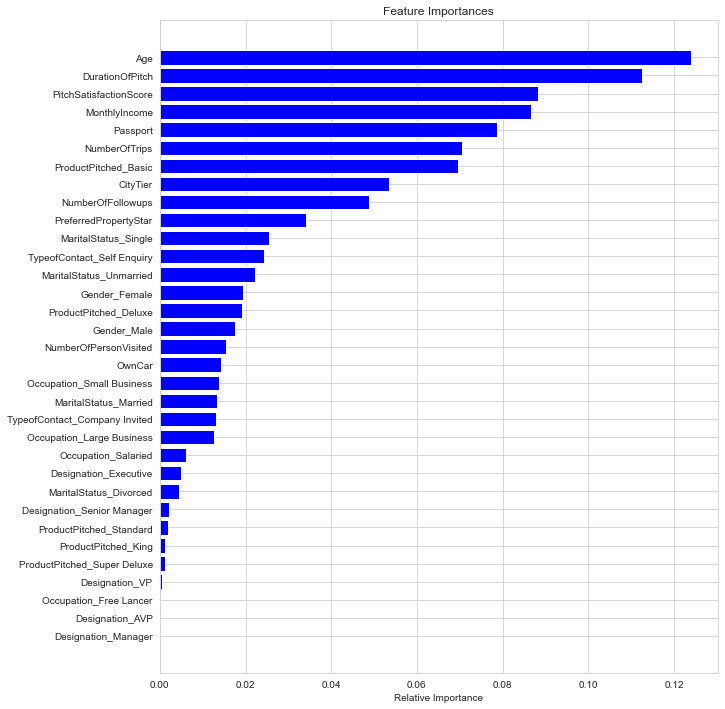


True-Positive:  228
True-Negative:  1119
False-Positive:  52
False-Negative:  68


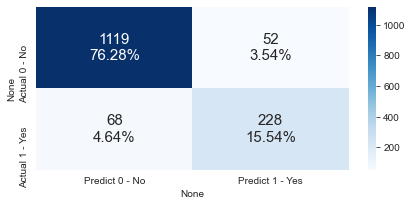

In [38]:
## Build Decision Tree Model aka CART(Classification And Regression Tree)
dt = DecisionTreeClassifier(criterion = 'gini' , random_state = 1)
dt.fit(X_train, y_train)
dt_score=get_metrics_score(dt,True)

 - Train-overfit as expected but did have very high accuracy.
 - Model did terrible as Recall is very high fo Testing.
 - This is not a very good model to follow.

### **Model Build:** Bagging Classifier


Training set Accuracy:  99.47383805904705
Test set Accuracy:  90.52488070892979

Training set Recall:  97.11538461538461
Test set Recall:  60.47297297297297


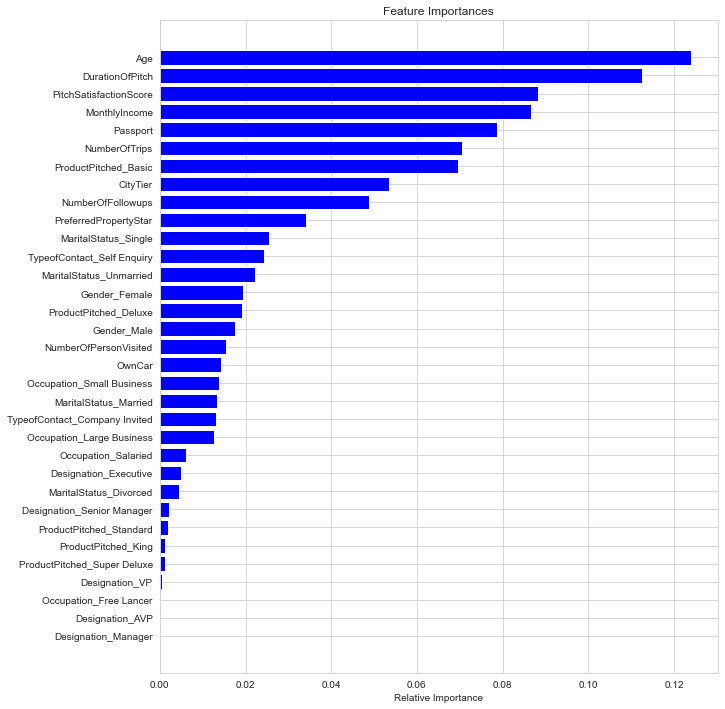


True-Positive:  228
True-Negative:  1119
False-Positive:  52
False-Negative:  68


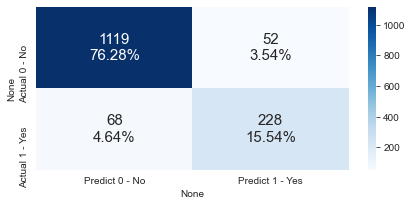

In [39]:
### Bagging Classifier
bc = BaggingClassifier(random_state=1)
bc.fit(X_train,y_train)
bc_score=get_metrics_score(bc,True)

 - This model also is overfitted but also preformed well on accuracy.
 - Training set Recall was veru high but in Test, performed lower on recall
 - This model is better, but still not good enough
 
 ### **Model Build:** Random Forest


Training set Accuracy:  100.0
Test set Accuracy:  90.79754601226993

Training set Recall:  100.0
Test set Recall:  56.41891891891891


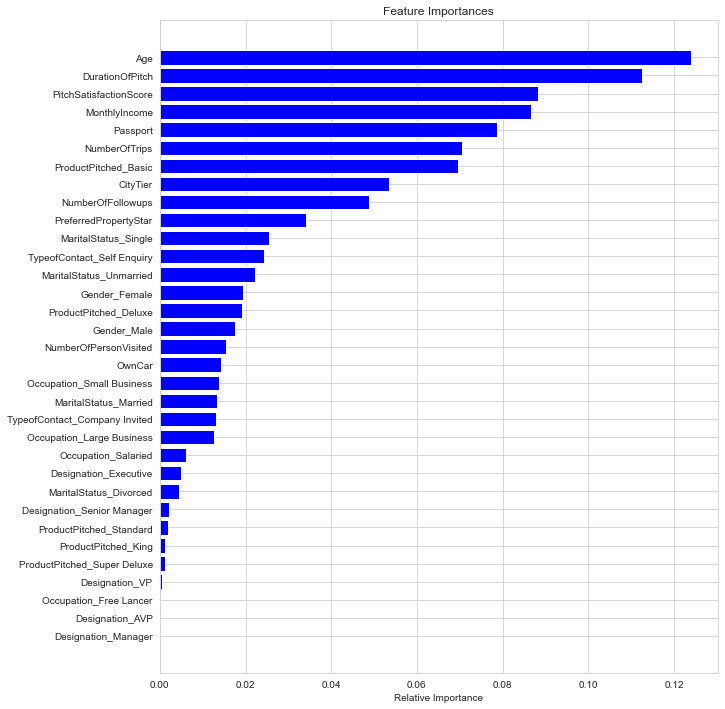


True-Positive:  228
True-Negative:  1119
False-Positive:  52
False-Negative:  68


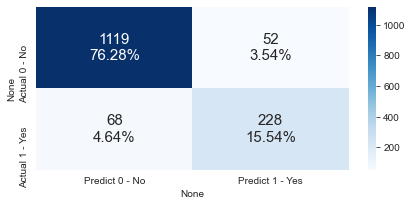

In [40]:
### Random Forest
rf = RandomForestClassifier(class_weight='balanced',random_state=1)
rf.fit(X_train,y_train)
rf_score=get_metrics_score(rf,True)

 - Train-overfit, high accuracy but the lowest of the three.
 - Model did terrible at Recall in Train but better in Testing.
 - With the standard parameters, this is the best model

### Bagging Model Performance Improvement (PI)
(Using GridSearchCV)


Training set Accuracy:  83.25051154633148
Test set Accuracy:  81.52692569870484

Training set Recall:  36.858974358974365
Test set Recall:  31.08108108108108


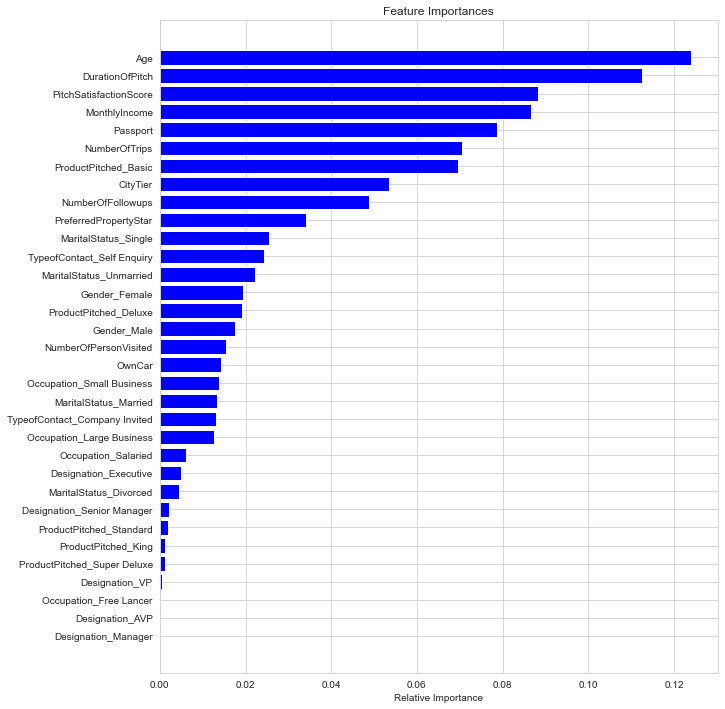


True-Positive:  228
True-Negative:  1119
False-Positive:  52
False-Negative:  68


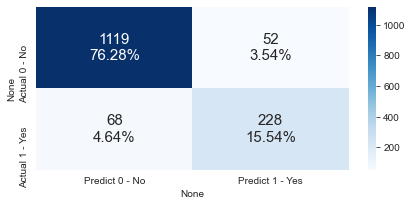

In [41]:
dt_tuned = DecisionTreeClassifier(random_state=1)
parameters =  {'max_depth': np.arange(1,10)
                ,'criterion': ['entropy','gini']
                ,'splitter': ['best','random']
                ,'min_impurity_decrease': [0.000001,0.00001,0.0001]
                ,'max_features': ['log2','sqrt']
               
#               'max_depth': np.arange(1,10), 
#               'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
#               'max_leaf_nodes' : [5, 10,15,20,25,30],
#               'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

acc_scorer = metrics.make_scorer(metrics.recall_score)
grid_obj = GridSearchCV(dt_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)
dt_tuned = grid_obj.best_estimator_

# Best Fit
dt_tuned.fit(X_train, y_train)
dt_tuned_score=get_metrics_score(dt_tuned,True)


- Not overfitted, and performed well on Test data
- Recall is much lower than previous models
- Up until now, this is the most effective model


### **PI:** Bagging Classifier



Training set Accuracy:  99.9123063431745
Test set Accuracy:  92.43353783231085

Training set Recall:  99.51923076923077
Test set Recall:  65.87837837837837


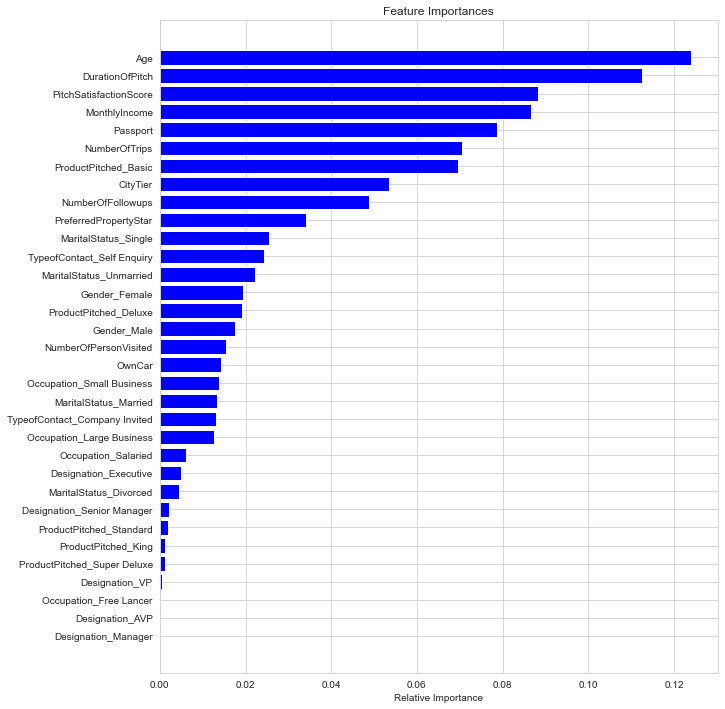


True-Positive:  228
True-Negative:  1119
False-Positive:  52
False-Negative:  68


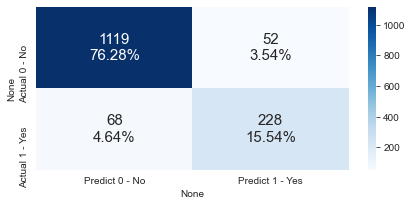

In [42]:
bc_tuned = BaggingClassifier(random_state=1)
parameters = {'max_samples': [0.7,0.8,0.9,1],
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }
acc_scorer = metrics.make_scorer(metrics.recall_score)
grid_obj = GridSearchCV(bc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)
bc_tuned = grid_obj.best_estimator_

# Best Fit
bc_tuned.fit(X_train, y_train)

bc_tuned_score=get_metrics_score(bc_tuned,True)

- Overfitted to Train, but performed well on Test data
- Recall is is very high in Train and lower in Test.
- This is not a very good model


### **PI:** Random Forrest


Training set Accuracy:  92.31218941829874
Test set Accuracy:  86.9120654396728

Training set Recall:  73.71794871794873
Test set Recall:  53.37837837837838


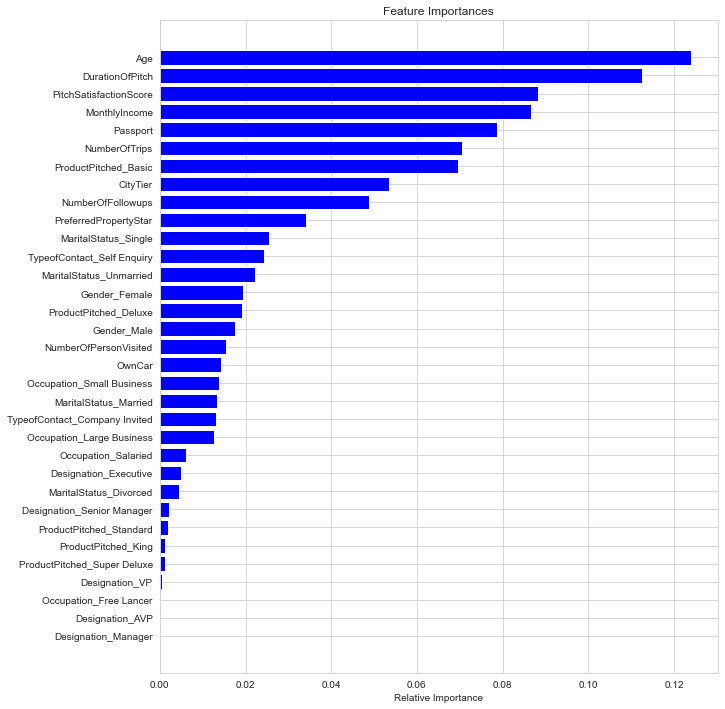


True-Positive:  228
True-Negative:  1119
False-Positive:  52
False-Negative:  68


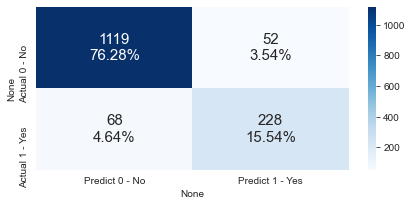

[0.9231218941829874, 0.869120654396728, 0.7371794871794872, 0.5337837837837838]

In [44]:
rf_tuned = RandomForestClassifier(random_state=1)
parameters = {"n_estimators": [150,200,250],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.7, 0.1),
    "max_samples": np.arange(0.3, 0.7, 0.1),
    "class_weight": [{0: 0.3, 1: 0.7}]
             }
acc_scorer = metrics.make_scorer(metrics.recall_score)
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)
rf_tuned = grid_obj.best_estimator_
# Best Fit
rf_tuned.fit(X_train, y_train)

get_metrics_score(rf_tuned,True)

- Training data is a bit overfit for Train. It performed well on Testing
- Recall gap between Train and Test is pretty large and Recall is high in both
- This is not a very good model.
- Tuned Decision Tree is still the best model up until this point.


True-Positive:  228
True-Negative:  1119
False-Positive:  52
False-Negative:  68


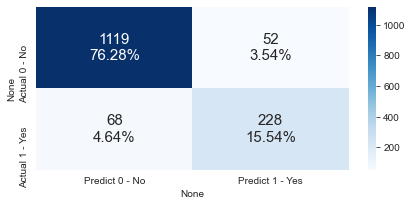


True-Positive:  228
True-Negative:  1119
False-Positive:  52
False-Negative:  68


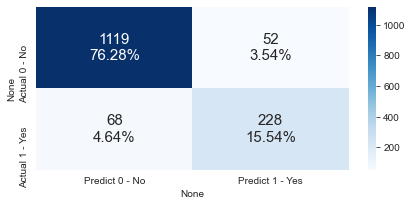


True-Positive:  228
True-Negative:  1119
False-Positive:  52
False-Negative:  68


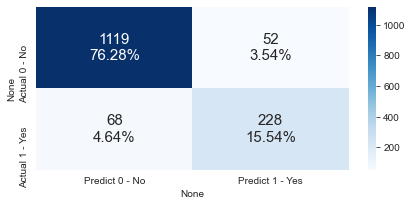


True-Positive:  228
True-Negative:  1119
False-Positive:  52
False-Negative:  68


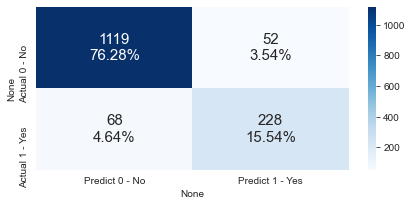


True-Positive:  228
True-Negative:  1119
False-Positive:  52
False-Negative:  68


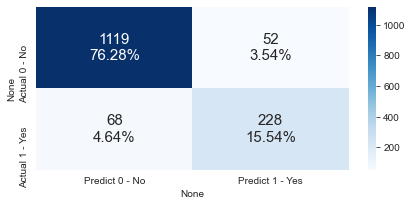


True-Positive:  228
True-Negative:  1119
False-Positive:  52
False-Negative:  68


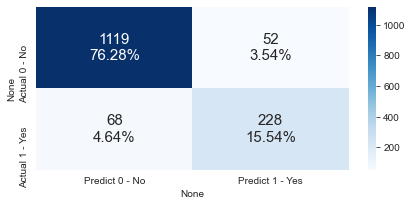

In [45]:
# Comparison Matrix for Boosting
models = [dt, dt_tuned, bc,bc_tuned,rf,rf_tuned]

# list for all the data of models
acc_train = []
acc_test = []
recall_train = []
recall_test = []

# looping the models; get the accuracy & recall
for model in models:
    j = get_metrics_score(model, False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))

comparison_Bagging = pd.DataFrame({'Model':['Decision Tree with default parameters'
                                            ,'Decision Tree Classifier'
                                            ,'Bagging classifier with default parameters'
                                            ,'Tuned Bagging Classifier'
                                            ,'Random Forest with deafult parameters'
                                            ,'Tuned Random Forest Classifier']
                                            , 'Train_Accuracy': acc_train, 'Test_Accuracy': acc_test
                                            , 'Train_Recall':recall_train, 'Test_Recall':recall_test
                                  }) 

## Conclusion: 
#### Of the Bagging models, the Tuned Decision Tree is the best option at a comperable Train and Test fit between about 81% & 83% for Accuracy.


#### The Recall also did well in both sets from about 37% to 31%. This yielded:
 - True-Positive:  228
 - True-Negative:  1119
 - False-Positive:  52
 - False-Negative:  68

In [46]:
# Reset and now stratify for Boosting
X = Tour.drop('ProdTaken', axis=1)
y = Tour['ProdTaken']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)

##  Boosting

### **Model Build:** Adaboost



Training set Accuracy:  84.59514761765566
Test set Accuracy:  85.07157464212679

Training set Recall:  31.987577639751553
Test set Recall:  32.971014492753625


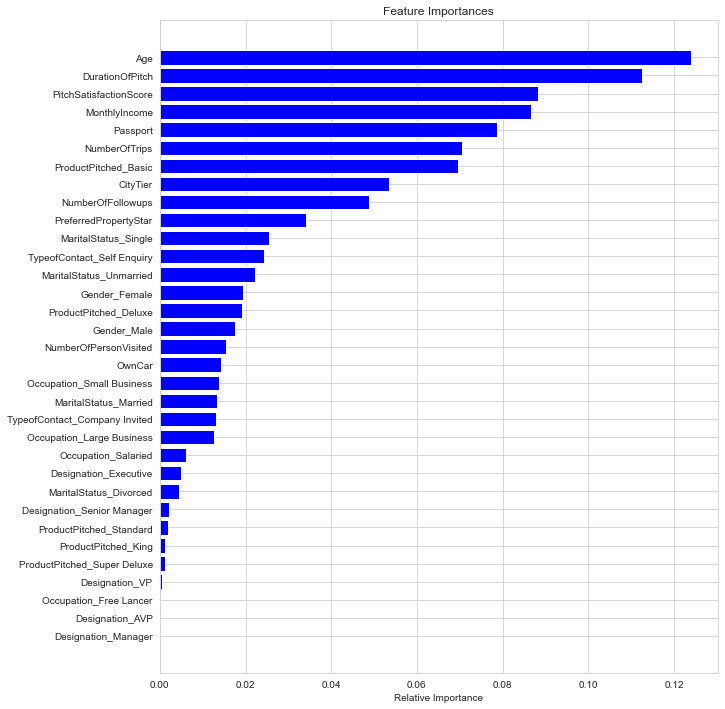


True-Positive:  261
True-Negative:  1181
False-Positive:  10
False-Negative:  15


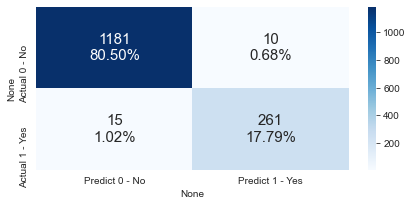

In [47]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)
abc_score=get_metrics_score(abc)

- No Overfitting on Train or Test.
- Recall is low and 
- This Adaboost compares well to the Tuned Decision Tree's recall.
- This is a good model.


### **Model Build:** Gradient Boost



Training set Accuracy:  88.62905583162818
Test set Accuracy:  87.04839809134288

Training set Recall:  46.273291925465834
Test set Recall:  41.30434782608695


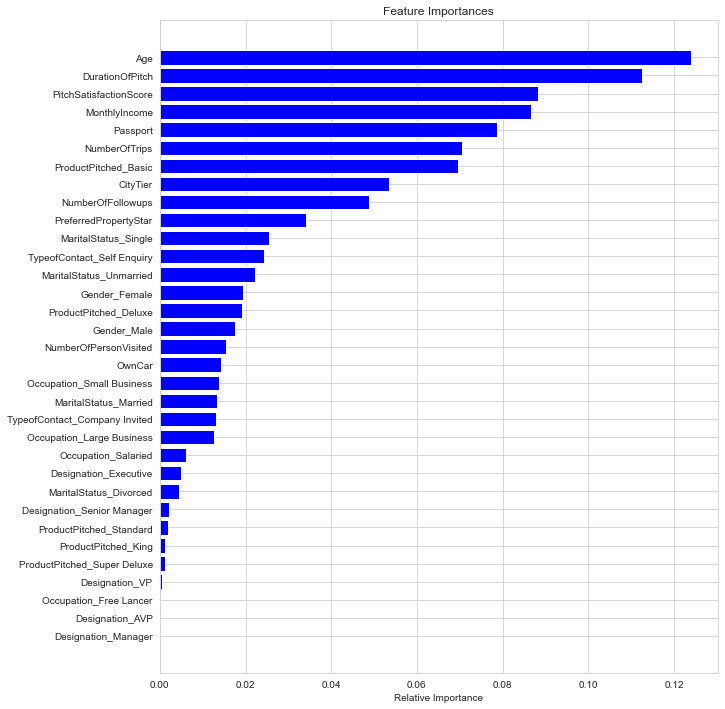


True-Positive:  261
True-Negative:  1181
False-Positive:  10
False-Negative:  15


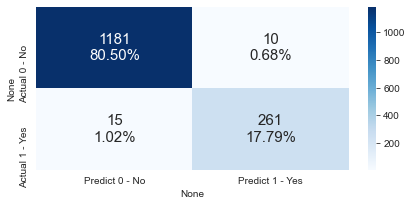

In [48]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)
gbc_score=get_metrics_score(gbc)

- Overfit on both Train and Test.
- Recall for Gradient Boost is lower but AdaBoost still performed better .
- This is not a good model.


### **Model Build:** XGBoost



Training set Accuracy:  99.97076878105817
Test set Accuracy:  92.43353783231085

Training set Recall:  99.84472049689441
Test set Recall:  71.73913043478261


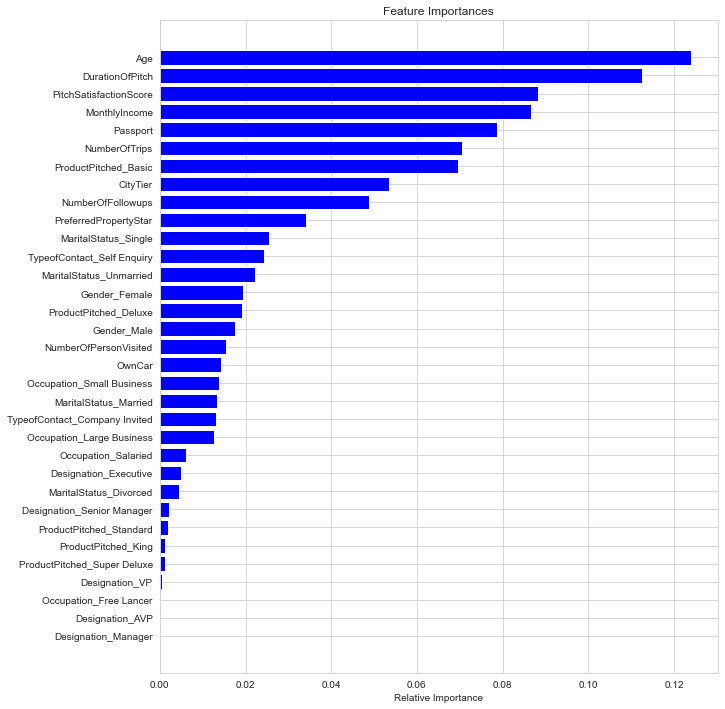


True-Positive:  261
True-Negative:  1181
False-Positive:  10
False-Negative:  15


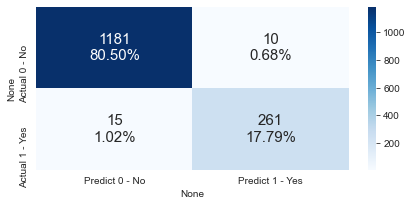

In [49]:
xgb = XGBClassifier(random_state=1, eval_metric='logloss')
xgb.fit(X_train,y_train)
xgb_score=get_metrics_score(xgb)

- Overfit on both Train and Test.
- Recall is very high.
- This is a terrible model.


## Boosting Model Performance Improvement

### **PI:** Ada Boosting


Training set Accuracy:  98.65536392867583
Test set Accuracy:  87.93456032719837

Training set Recall:  94.87577639751554
Test set Recall:  64.13043478260869


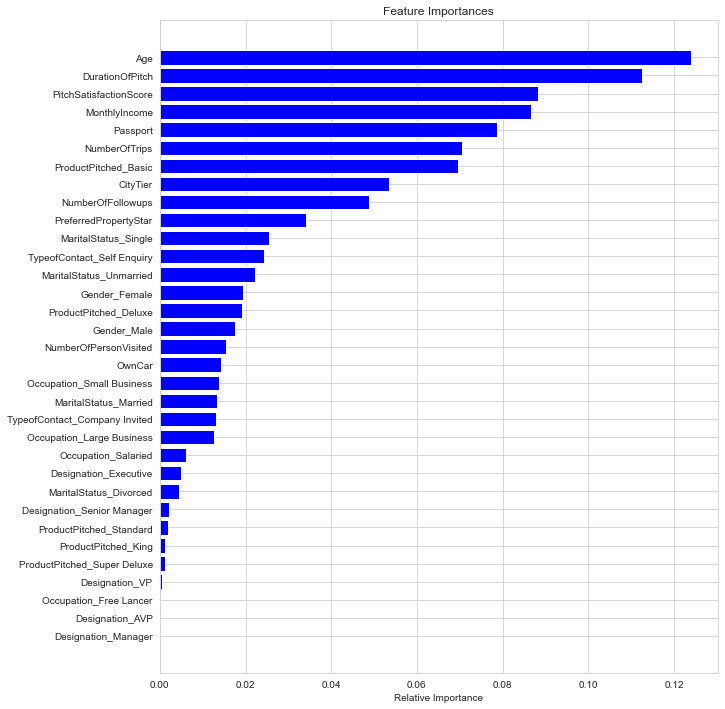


True-Positive:  261
True-Negative:  1181
False-Positive:  10
False-Negative:  15


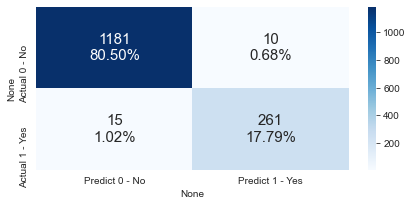

In [51]:
abc_tuned = AdaBoostClassifier(random_state=1)
parameters = {
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

acc_scorer = metrics.make_scorer(metrics.recall_score)
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)
abc_tuned = grid_obj.best_estimator_

# Best Fit
abc_tuned.fit(X_train, y_train)
abc_tuned_score=get_metrics_score(abc_tuned)

- Overfit on Train but performed well on Test.
- Recall is very high in Train, lower in Test but still too high to be considered a good model.
- The default parameters worked better than the modification as they are very sensitive.

### **PI:** Gradient Boosting



Training set Accuracy:  88.77521192633733
Test set Accuracy:  86.63940013633265

Training set Recall:  46.273291925465834
Test set Recall:  38.768115942028984


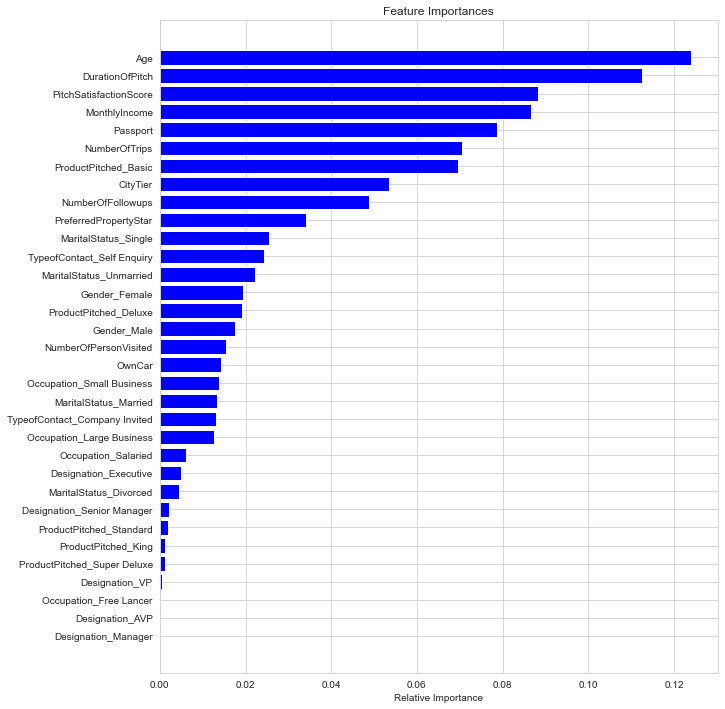


True-Positive:  261
True-Negative:  1181
False-Positive:  10
False-Negative:  15


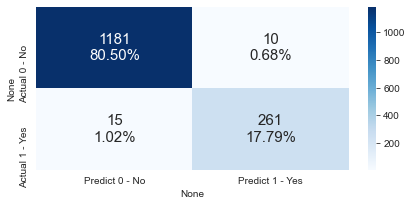


Training set Accuracy:  91.81525869628764
Test set Accuracy:  88.27539195637355

Training set Recall:  60.71428571428571
Test set Recall:  48.55072463768116


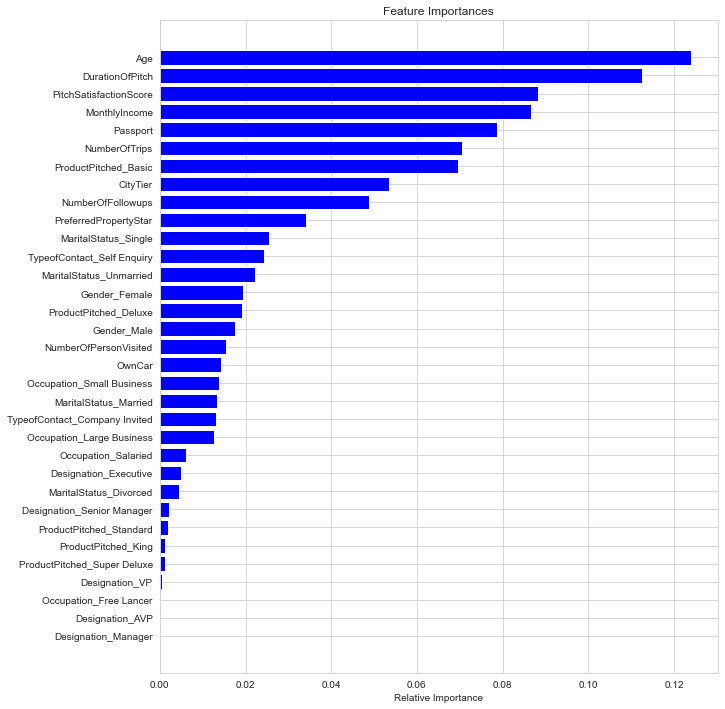


True-Positive:  261
True-Negative:  1181
False-Positive:  10
False-Negative:  15


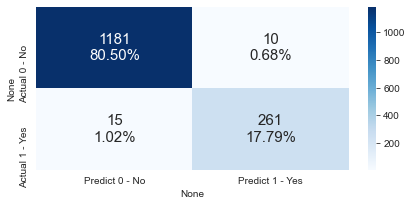

In [52]:
gbc_init = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)
gbc_init.fit(X_train,y_train)

gbc_init_score=get_metrics_score(gbc_init)
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

acc_scorer = metrics.make_scorer(metrics.recall_score)
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)
gbc_tuned = grid_obj.best_estimator_

# Best Fit
gbc_tuned.fit(X_train, y_train)
gbc_tuned_score=get_metrics_score(gbc_tuned)

- Did not overfit Train nor Test.
- Recall is lower than Default Parameters, lower in Test but still too high for the desired model.

In [ ]:
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')
parameters = {
    "n_estimators": np.arange(10,100,20),
    "scale_pos_weight":[0,1,2,5],
    "subsample":[0.5,0.7,0.9,1],
    "learning_rate":[0.01,0.1,0.2,0.05],
    "gamma":[0,1,3],
    "colsample_bytree":[0.5,0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,0.9,1]
}

acc_scorer = metrics.make_scorer(metrics.recall_score)
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)
xgb_tuned = grid_obj.best_estimator_

# Best Fit
xgb_tuned.fit(X_train, y_train)

xgb_tuned_score=get_metrics_score(xgb_tuned)

Note: After executing for 2+ hours, xgb_tuned did not complete running so it had to be excluded from the analysis.

In [ ]:
models = [abc, abc_tuned, gbc, gbc_init, gbc_tuned, xgb, xgb_tuned]

# reset
acc_train = []
acc_test = []
recall_train = []
recall_test = []

# readd but for Boosting
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))

comparison_Boosting = pd.DataFrame({'Model':['AdaBoost with default paramters'
                                             ,'AdaBoost Tuned'
                                             , 'Gradient Boosting with default parameters'
                                             , 'Gradient Boosting with init=AdaBoost'
                                             , 'Gradient Boosting Tuned','XGBoost with default parameters'
                                             , 'XGBoost Tuned']
                                             , 'Train_Accuracy': acc_train, 'Test_Accuracy': acc_test
                                             , 'Train_Recall':recall_train, 'Test_Recall':recall_test
                                   }) 

In [ ]:
comparison_Bagging
comparison_Boosting

## <a id = "link7">Actionable Insights and Recommendations</a>

With a data split of 30/70 using Bagging and Boosting models & using Hyperparameters through GridSearchCV(), ADABOOSTING without changing parameters performed the best. Hypertuning did not work well as the parameters are very sensitive. The recall ADABOOSTING resulted in about 31% for Train and 37% Test with an accuracy of about 81% for Train and 83% Test.

- I determined while the Accuray was consitently high, however, Recall is the approriate metric to use for Performance Evaluation. For this situation, Recall is a better metric as we would like to lower the costs to minimize resources spend on Customers that will not be taking the Package. In the effort's for *VISIT WITH US's* Marketing Team to minimize waste and best utilize their resources, I recommend the implementation of the ADABOOSTING model be used to determine if a customer will take the Package offering for the Wellness Tourism Package. While the data cannot determine the lifestyle of the customer, the efforts are better focused on those who are likely to travel and are predicted to take the 'Basic' package offering. 

- On reviewing feature imporance, no single-one-feature had a heavy impact on the decision. Instead it was a combination of various features both on the Customer and Interaction data. The most impactful features were: 'DurationOfPitch', 'Age', 'MonthlyIncome', 'PitchSatisfactionScore','Passport', respectively

- The factors which VISIT WITH US's has least control over is the customer features, although how they are market to is under the company's control. Effort can be put into the right customers and to do so Age, MonthlyIncome and Passpor are the most significant factors that determine if a Customer will take the package using this model.

- As for the business model, efforts should be made to continually improving on the Interaction features of which DurationOfPitch, PitchSatisfactionScore, ProductPitched were the most impactful. The Wellness Tourism Package should be designed for features similar to the Basic Package. This is where I believe the most benefit in investment of resources will be best allocated. The majority that did take the packages took the basic which is consistent with a lower monthly income.
 
        
**Conclusion:** Using this model, not identifying  potential customers results in wasted resources. Identifying before commiting resources will lead to better utilization of resouces instead of waste. This futher iterates the need for Recall to be used to evaluate model  performance.

# <a href = #link100>`Back to the top` </a>